In [1]:
# Import needed packages and define rootpath
import os
import sys
import pandas as pd
import glob
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

root_path = os.path.abspath(os.path.join('../..')) # <- adjust such that root_path always points at the root project dir (i.e. if current file is two folders deep, use '../..'). 
if root_path not in sys.path:
    sys.path.append(root_path)


In [3]:
# Get sweep_results for desired features/hyperparamter/metrics from desired coarse tuning
pkl_files = glob.glob(os.path.join(root_path, "models", "trad_ml", "sweep_results","logreg_feature_ma_min_and_restart", "*.pkl"))

accuracy_min_periods_restart_each_season = []
for file in pkl_files:
    with open(file, 'rb') as f:
        obj = pkl.load(f)
        file_name = os.path.basename(file)  # Get only the file name from the path
        file_name_without_ext = os.path.splitext(file_name)[0]  # Remove the file extension
        shortened_file_name = file_name_without_ext[:-16]  # Remove the last 6 characters
        accuracy_min_periods_restart_each_season.append({
            'Restart Each Season': obj['fg_config']['ma_restart_each_season'],
            'Minimum Periods':obj['fg_config']['ma_min_periods'],
            'Accuracy': obj['metrics']['accuracy'],
            'Log Loss': obj['metrics']['lnloss'],
        })

df = pd.DataFrame(accuracy_min_periods_restart_each_season)

print(df)

    Restart Each Season  Minimum Periods  Accuracy  Log Loss
0                  True                5  0.512654  1.008476
1                 False                6  0.528852  0.994612
2                  True                6  0.517845  1.004415
3                 False                7  0.528949  0.995591
4                  True                7  0.521008  1.005031
5                 False                8  0.531303  0.994789
6                  True                8  0.521045  1.002428
7                 False                9  0.528580  0.994797
8                  True                9  0.521148  1.007263
9                 False               10  0.528141  0.993127
10                False                1  0.525563  0.997460
11                 True               10  0.520982  1.011185
12                 True                1  0.512181  1.016916
13                False                2  0.523993  0.996080
14                 True                2  0.507611  1.014278
15                False 

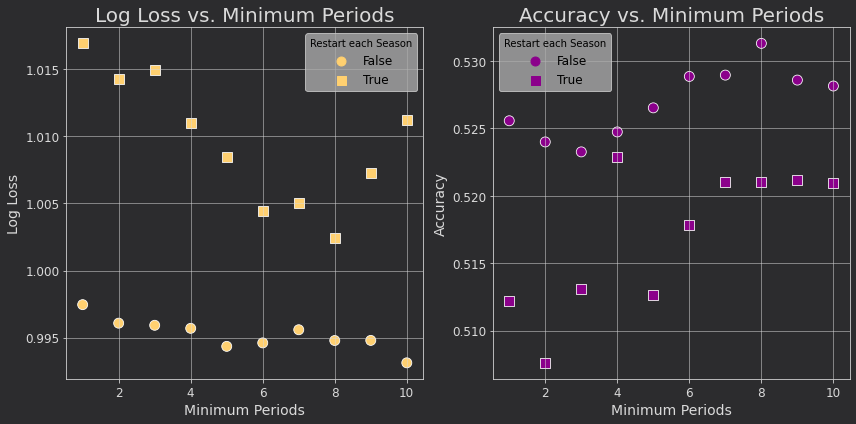

In [25]:
#Plot
# Define the color palette for the 'Restart Each Season' hue
log_loss_color = (255/255, 208/255, 112/255)   # Gold
accuracy_color = (139/255, 0/255, 139/255)    # Purple
label_color = (218/255, 218/255, 218/255)     # Light grey
grid_color = (218/255, 218/255, 218/255)      # Light grey
background_color = (44/255, 44/255, 46/255)   # Dark grey
legend_color = (169/255, 169/255, 169/255)    # Grey

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Set the background color of the plot (entire figure)
fig.set_facecolor(background_color)

# Plot the 'Log Loss' against 'Minimum Periods' in the first subplot using scatter plot
sns.scatterplot(x='Minimum Periods', y='Log Loss', hue='Restart Each Season', style='Restart Each Season',
                data=df, markers=['o', 's'], palette={True: log_loss_color, False: log_loss_color},
                s=100, ax=axes[0])  # Set the marker size (s=100 for larger dots)

# Set titles and labels for subplot
axes[0].set_title('Log Loss vs. Minimum Periods', color=label_color, fontsize =  20)
axes[0].set_xlabel('Minimum Periods', color=label_color, fontsize = 14)
axes[0].set_ylabel('Log Loss', color=label_color, fontsize = 14)
axes[0].grid(True, color=grid_color, linestyle='-', linewidth=0.5)
axes[0].tick_params(axis='x', colors=label_color, labelsize =12)
axes[0].tick_params(axis='y', colors=label_color, labelsize =12)
axes[0].spines['top'].set_color(label_color)
axes[0].spines['bottom'].set_color(label_color)
axes[0].spines['left'].set_color(label_color)
axes[0].spines['right'].set_color(label_color)
axes[0].legend(title = "Restart each Season", facecolor=legend_color, markerscale=1.5, fontsize= 12)  # Adjust the legend_markerscale to control the size of legend markers

# Set the facecolor for the first subplot
axes[0].set_facecolor(background_color)

# Plot the 'Accuracy' against 'Minimum Periods' in the second subplot using scatter plot
sns.scatterplot(x='Minimum Periods', y='Accuracy', hue='Restart Each Season', style='Restart Each Season',
                data=df, markers=['o', 's'], palette={True: accuracy_color, False: accuracy_color},
                s=100, ax=axes[1])  # Set the marker size (s=100 for larger dots)

# Set titles and labels for subplot
axes[1].set_title('Accuracy vs. Minimum Periods', color=label_color, fontsize= 20)
axes[1].set_xlabel('Minimum Periods', color=label_color, fontsize = 14)
axes[1].set_ylabel('Accuracy', color=label_color, fontsize =14)
axes[1].grid(True, color=grid_color, linestyle='-', linewidth=0.5)
axes[1].tick_params(axis='x', colors=label_color, labelsize = 12)
axes[1].tick_params(axis='y', colors=label_color, labelsize = 12)
axes[1].spines['top'].set_color(label_color)
axes[1].spines['bottom'].set_color(label_color)
axes[1].spines['left'].set_color(label_color)
axes[1].spines['right'].set_color(label_color)
axes[1].legend(title = "Restart each Season" ,facecolor=legend_color, markerscale=1.5, fontsize = 12)  # Adjust the legend_markerscale to control the size of legend markers

# Set the facecolor for the second subplot
axes[1].set_facecolor(background_color)

plt.tight_layout()  # Adjust spacing between subplots

# Save plot 
plt.savefig("optimization_min_periods_and_restart_each_season_plot.png", dpi=300, bbox_inches="tight")

plt.show()
